# Testing the trained Log - Log 14th Degree Poly model

# Test on psm 2017 Data

In [126]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
print(os.listdir())

['.statistical_irradience_modeling.ipynb.icloud', 'data_munger.py', 'Testing_Data', 'statistical_irradience_modeling.ipynb', '.DS_Store', '.statistical_irradience_modeling 6.ipynb.icloud', '.Data_Viz 2.ipynb.icloud', '.statistical_irradience_modeling 16.ipynb.icloud', '.statistical_irradience_modeling 11.ipynb.icloud', '.statistical_irradience_modeling 7.ipynb.icloud', 'Log_Log_Polynomial_clf.joblib', 'Raw_Data', '.statistical_irradience_modeling 10.ipynb.icloud', '.statistical_irradience_modeling 17.ipynb.icloud', 'README.md', '.statistical_irradience_modeling 2.ipynb.icloud', '.statistical_irradience_modeling 5.ipynb.icloud', 'scratch', '.statistical_irradience_modeling 15.ipynb.icloud', '.statistical_irradience_modeling 12.ipynb.icloud', 'statistical_irradience_modeling 21.ipynb', 'statistical_irradience_modeling 18.ipynb', 'psm_VA_Charlottesville2018cloud_output.csv', '.statistical_irradience_modeling 4.ipynb.icloud', '.statistical_irradience_modeling 3.ipynb.icloud', '.statistical

In [127]:
#Time for Polynomial Fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
#Okay none of these are super good. Lets do a boxcox transformation
from sklearn.preprocessing import power_transform

In [128]:
_Curr_Dir = os.getcwd()
_Testing_Data_Dir = os.path.join(_Curr_Dir, 'Testing_Data')
print(_Curr_Dir)
print(_Testing_Data_Dir)
# data_path = os.path.join(curr_dir, 'Data_Files', 'Testing_Data')
# print(os.listdir(data_path))

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor
/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data


In [142]:
def logify_df(df):
    df['DHI_log'] = np.log(df['DHI'])
    df['GHI_log'] = np.log(df['GHI'])
    df['cloud_cover_log'] = np.log(df['Cloud Cover']+0.0000001)
    return df

In [143]:
def make_df_nonzero(df):
    df_no_zero = df.loc[df['DHI']!= 0 ]
    assert len(df_no_zero['DHI'])==len(df_no_zero['GHI']), "Some DHI 0s where GHI is not 0"
    print(df_no_zero)
    return df_no_zero 

In [144]:
def meta_visualization(data, x='GHI', y='DHI', z='Cloud Cover'):
    sns.lmplot(x, y, data=data, hue=z, fit_reg=False)
    plt.show()
    return

In [145]:
def featureHistograms(df, features=['GHI','DHI','Cloud Cover'],):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=len(features))
    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=axs[i])

In [146]:
def runPolyModel(X, Y, model, degrees=14):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    result = show_model_metrics(_X_poly, Y, model)
    return result[0], result[1]
    

In [147]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        print("median absolute error is ", median_absolute_error(Y, preds))
        print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
        return preds, resids

In [148]:
def show_model_metrics_logBackTrans(X, Y, model):
    preds = model.predict(X)
    preds = np.exp(preds)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [226]:
def three_dee_viz(x,y,z,preds=[]):
    #3d viz
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.set(xlabel='arg1', ylabel='arg2', zlabel='arg3')
    ax.scatter(x,y,z)
    if any(preds):
        ax.scatter(x, preds,z)
    plt.show()

In [150]:
#Load the model

In [151]:
from joblib import dump, load
clf = load("Log_Log_Polynomial_clf.joblib")

print(clf)
print(type(clf))
print(clf.intercept_)
print(clf.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.03813301661493895
[ 0.00000000e+00  1.13173390e+00  6.48804596e-02 -2.24856838e-01
 -1.08815393e-01  1.09121819e-01  1.00055290e-01  7.04064560e-02
  2.47889391e-02  7.29533807e-02 -1.66462843e-02 -6.93044561e-03
 -7.86819765e-04 -1.43880878e-03  1.09759801e-02  8.09468249e-04
 -1.34202901e-04 -5.04237074e-04 -3.27036609e-04 -2.10783445e-04
  4.25245749e-04]


In [152]:
#Load data
#2017 psm data
# Lat/lon: 43.85, -99.5

df1_psm_2017= pd.read_csv(os.path.join(_Testing_Data_Dir, 'psm_testing_data2017.csv'))
#Remove Zeros
df1_psm_2017 = make_df_nonzero(df1_psm_2017)
df1_psm_2017['Cloud Cover'] = df1_psm_2017['Cloud Cover'].apply(lambda x: x+0.00001)
#Logify
df1_psm_2017 = logify_df(df1_psm_2017)
print(df1_psm_2017['cloud_cover_log'])

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
14    2017      1    1    14      30           -9            14           238   
15    2017      1    1    15      30           -7            47           614   
16    2017      1    1    16      30           -5            66           753   
17    2017      1    1    17      30           -3            78           809   
18    2017      1    1    18      30           -1            86           815   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8754  2017     12   31    18      30          -18            73           926   
8755  2017     12   31    19      30          -18            70           923   
8756  2017     12   31    20      30          -18            62           884   
8757  2017     12   31    21      30          -18            49           786   
8758  2017     12   31    22      30          -20            27           541   

      Clearsky GHI  Cloud T

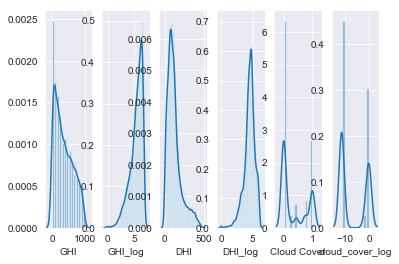

In [245]:
featureHistograms(df1_psm_2017, ['GHI', 'GHI_log', 'DHI', 'DHI_log', 'Cloud Cover', 'cloud_cover_log'])

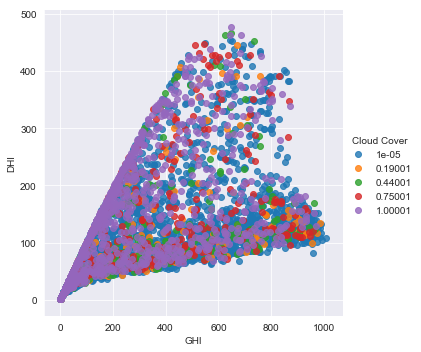

In [236]:
#Check the data out
meta_visualization(df1_psm_2017)

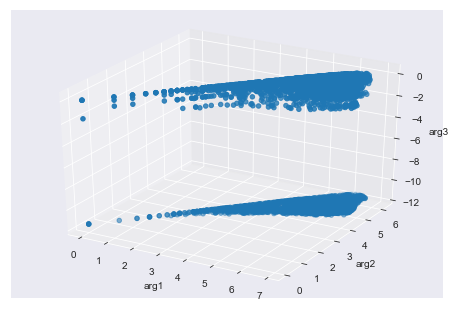

In [237]:
#And now with logs
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'])

In [238]:
def initPolyModel(X, degrees=5):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    return _X_poly

In [239]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        pass
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [240]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['cloud_cover_log'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf)

rmse is  13.055459551334755
r2 is  -227.12348246050587
mean absolute error is  10.052059264020427
median absolute error is  16.182487897578078
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


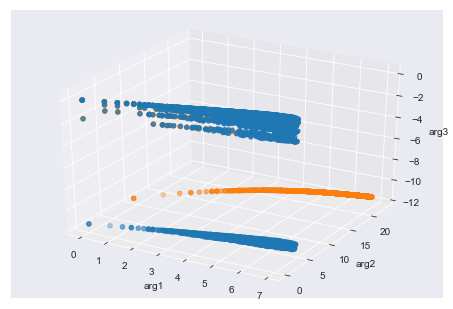

In [241]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'], preds)

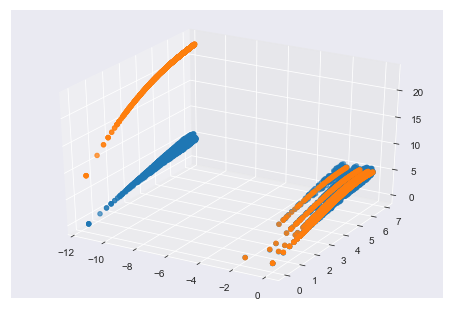

In [244]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [214]:
#Something is OFF

In [215]:
Y_actual = df1_psm_2017['DHI']
preds = np.exp(preds)
rmse = np.sqrt(mean_squared_error(Y_actual,preds))
r2 = r2_score(Y_actual,preds)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(Y_actual,preds))
# print("mean squared log error is ", mean_squared_log_error(Y, preds))
print("median absolute error is ", median_absolute_error(Y_actual, preds))
print("MAPE is ", np.mean(np.abs((Y_actual - preds) / Y_actual)) * 100)


rmse is  3924022822.7051477
r2 is  -1860870744205936.5
mean absolute error is  2481981170.5250463
median absolute error is  530173166.0934728
MAPE is  2270839343.88784


In [216]:
#Yup, way OFF

In [246]:
#THEORY: Log transform of Cloud Cover causes huge loss in cloud cover data explanability

In [247]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf)

rmse is  0.5586803292205768
r2 is  0.5822538785161409
mean absolute error is  0.45433801622246855
mean squared log error is  0.010039376996711029
median absolute error is  0.39994081663819303
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


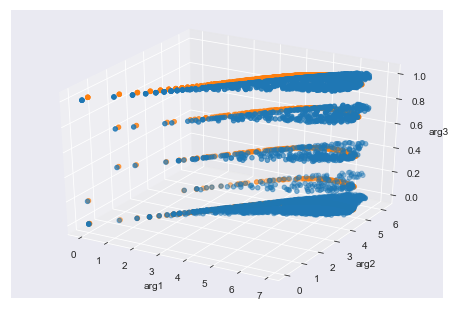

In [249]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

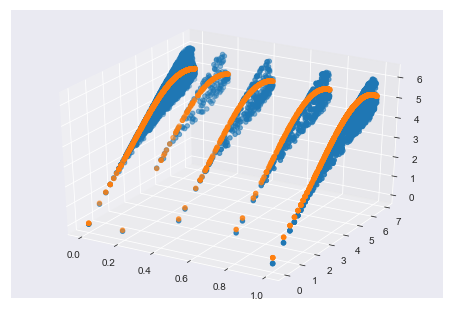

In [250]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [217]:
#Lets try with a different model

## Polynomial fit in log data 

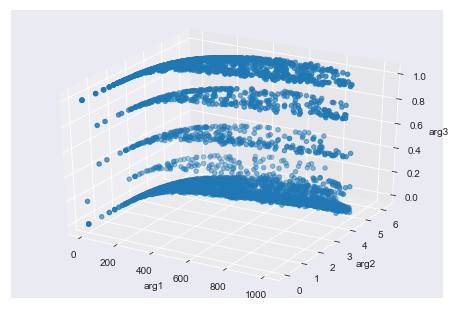

In [218]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [219]:
#Load model

In [220]:
clf_poly = load("Polynomial_clf.joblib")

print(clf)
print(type(clf))
print(clf.intercept_)
print(clf.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.03813301661493895
[ 0.00000000e+00  1.13173390e+00  6.48804596e-02 -2.24856838e-01
 -1.08815393e-01  1.09121819e-01  1.00055290e-01  7.04064560e-02
  2.47889391e-02  7.29533807e-02 -1.66462843e-02 -6.93044561e-03
 -7.86819765e-04 -1.43880878e-03  1.09759801e-02  8.09468249e-04
 -1.34202901e-04 -5.04237074e-04 -3.27036609e-04 -2.10783445e-04
  4.25245749e-04]


In [221]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly)

rmse is  0.4886969939368489
r2 is  0.6803571451494024
mean absolute error is  0.3942171508027232
mean squared log error is  0.009854842073433994
median absolute error is  0.35343005208508393
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


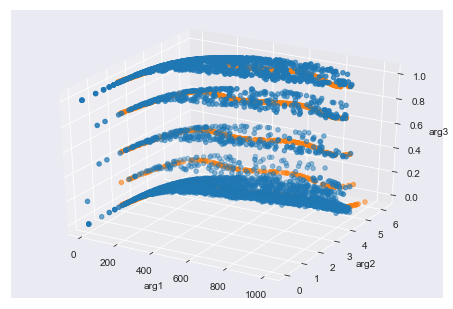

In [222]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)

## Polynomial fit in log-log except Cloud Data

In [251]:
clf_poly_2 = load("Log_Polynomial_clf.joblib")

print(clf)
print(type(clf))
print(clf.intercept_)
print(clf.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.03813301661493895
[ 0.00000000e+00  1.13173390e+00  6.48804596e-02 -2.24856838e-01
 -1.08815393e-01  1.09121819e-01  1.00055290e-01  7.04064560e-02
  2.47889391e-02  7.29533807e-02 -1.66462843e-02 -6.93044561e-03
 -7.86819765e-04 -1.43880878e-03  1.09759801e-02  8.09468249e-04
 -1.34202901e-04 -5.04237074e-04 -3.27036609e-04 -2.10783445e-04
  4.25245749e-04]


In [252]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly_2)

rmse is  0.5586803292205768
r2 is  0.5822538785161409
mean absolute error is  0.45433801622246855
mean squared log error is  0.010039376996711029
median absolute error is  0.39994081663819303
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


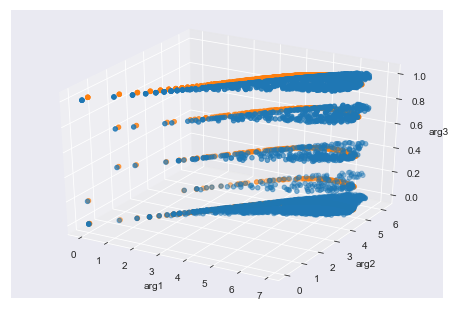

In [253]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)